In [1]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as keras

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# data preparation for dicty
from prepare_data import *

In [3]:
import sys
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils

# load unet model
from unet_model import *

In [4]:
%matplotlib inline

In [6]:
def eval_model(image_size, isLog = False, isNormOverDiagonals = True):
    X, y = prepare_data(image_size, isLog, isNormOverDiagonals)

    # Split train and valid
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2018)

    input_img = Input((image_size, image_size, 1), name='img')
    model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    weights_path = 'weights/model_unet_' + str(image_size)
    if isNormOverDiagonals:
        weights_path += '_norm'
    if isLog:
        weights_path += '_log'
    weights_path += '.h5'
    
    
    callbacks = [
        EarlyStopping(patience=10, verbose=1),
        ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
        ModelCheckpoint(weights_path, verbose=1, save_best_only=True, save_weights_only=True)
    ]

    results = model.fit(X_train, y_train, batch_size=1, epochs=100, callbacks=callbacks, 
                        validation_data=(X_valid, y_valid))

    plot_model_scores(results)

    model.load_weights(weights_path)
    score, acc = model.evaluate(X_valid, y_valid, verbose=1)
    
    print('Test score:', score)
    print('Test accuracy:', acc)

    # Predict on train, val and test
    preds_train = model.predict(X_train, verbose=1)
    preds_val = model.predict(X_valid, verbose=1)

    # Threshold predictions
    preds_train_t = (preds_train > 0.5).astype(np.uint8)
    preds_val_t = (preds_val > 0.5).astype(np.uint8)
    
    print('Train example 1')
    loops_utils.plot_HiC(np.log(np.reshape(X_train[1,:,:,:], (image_size,image_size))), figsize=(5,5))
    loops_utils.plot_HiC(np.reshape(preds_train[1,:,:,:], (image_size,image_size)), figsize=(5,5))
    loops_utils.plot_HiC(np.reshape(preds_train_t[1,:,:,:], (image_size,image_size)), figsize=(5,5))
    loops_utils.plot_HiC(np.reshape(y_train[1,:,:,:], (image_size,image_size)), figsize=(5,5))
    
    print('validation example 2')
    loops_utils.plot_HiC(np.log(np.reshape(X_valid[2,:,:,:], (image_size,image_size))), figsize=(5,5))
    loops_utils.plot_HiC(np.reshape(preds_val_t[2,:,:,:], (image_size,image_size)), figsize=(5,5))
    loops_utils.plot_HiC(np.reshape(preds_val[2,:,:,:], (image_size,image_size)), figsize=(5,5))
    loops_utils.plot_HiC(np.reshape(y_train[2,:,:,:], (image_size,image_size)), figsize=(5,5))

NOT log, normalized over diagonals

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 113 samples, validate on 21 samples
Epoch 1/100
113/113 [==============================] - 25s 223ms/step - loss: 0.4377 - acc: 0.7890 - val_loss: 0.4171 - val_acc: 0.8076

Epoch 00001: val_loss improved from inf to 0.41705, saving model to weights/model_unet_32_norm.h5
Epoch 2/100
113/113 [==============================] - 11s 97ms/step - loss: 0.3370 - acc: 0.8356 - val_loss: 0.4948 - val_acc: 0.7745

Epoch 00002: val_loss did not improve from 0.41705
Epoch 3/100
113/113 [==============================] - 11s 93ms/step - loss: 0.3154 - acc: 0.8480 - val_loss: 0.4728 - val_acc: 0.7937

Epoch 00003: val_loss did not improve from 0.41705
Epoch 4/100
113/113 [==============================] - 11s 99ms/step - loss: 0.3007 - acc: 0.8588 - val_loss: 0

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


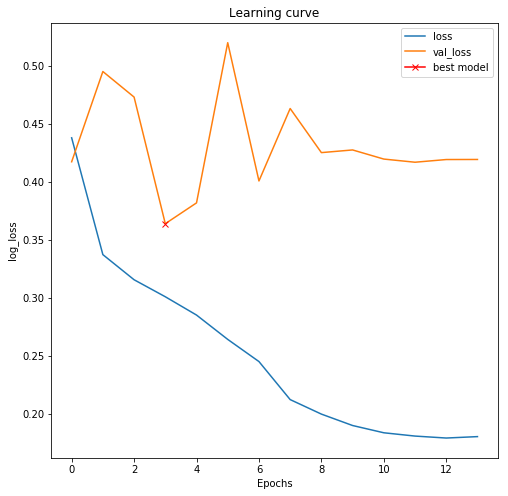

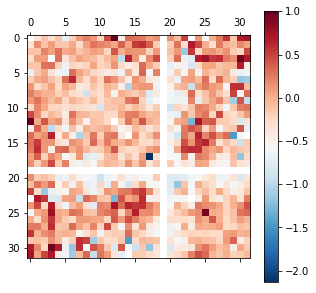

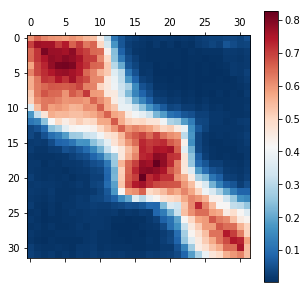

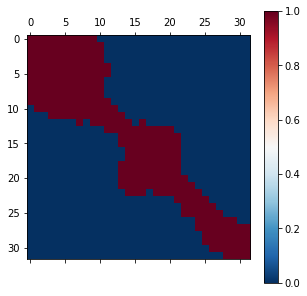

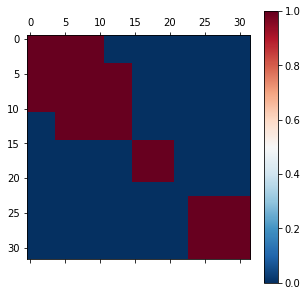

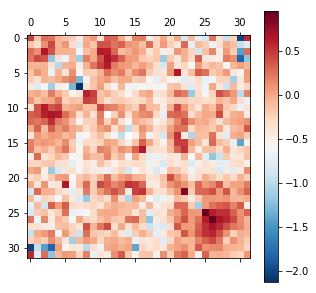

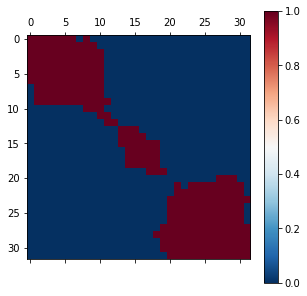

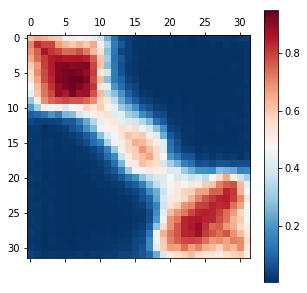

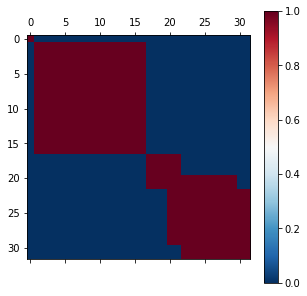

In [7]:
eval_model(image_size = 32, isLog=False, isNormOverDiagonals=True)

Train on 57 samples, validate on 11 samples
Epoch 1/100
57/57 [==============================] - 23s 403ms/step - loss: 0.3878 - acc: 0.8638 - val_loss: 0.3266 - val_acc: 0.8910

Epoch 00001: val_loss improved from inf to 0.32659, saving model to weights/model_unet_64_norm.h5
Epoch 2/100
57/57 [==============================] - 7s 127ms/step - loss: 0.2462 - acc: 0.9065 - val_loss: 0.6077 - val_acc: 0.7305

Epoch 00002: val_loss did not improve from 0.32659
Epoch 3/100
57/57 [==============================] - 7s 128ms/step - loss: 0.2132 - acc: 0.9101 - val_loss: 0.1898 - val_acc: 0.9111

Epoch 00003: val_loss improved from 0.32659 to 0.18982, saving model to weights/model_unet_64_norm.h5
Epoch 4/100
57/57 [==============================] - 8s 135ms/step - loss: 0.1931 - acc: 0.9150 - val_loss: 0.1931 - val_acc: 0.9134

Epoch 00004: val_loss did not improve from 0.18982
Epoch 5/100
57/57 [==============================] - 8s 142ms/step - loss: 0.1814 - acc: 0.9195 - val_loss: 0.1674 - 

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


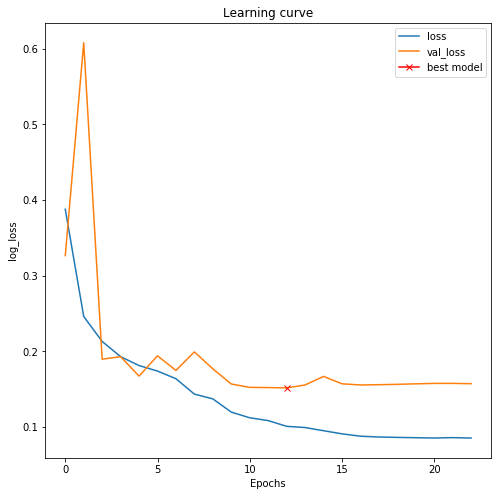

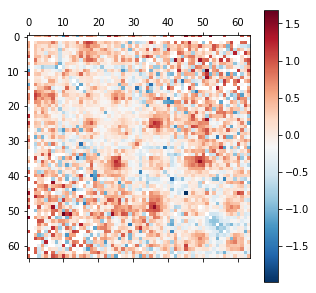

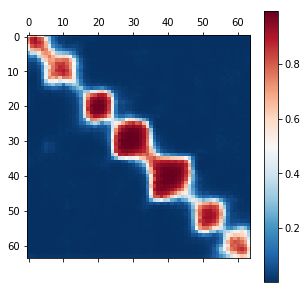

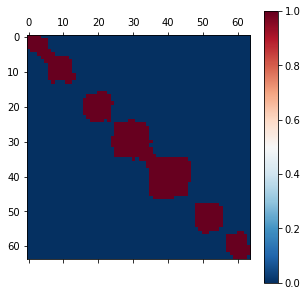

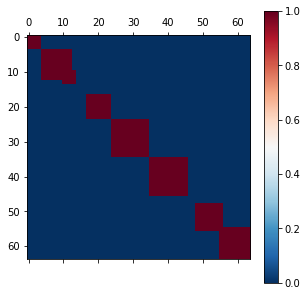

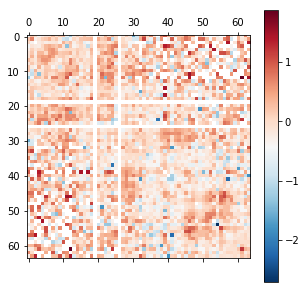

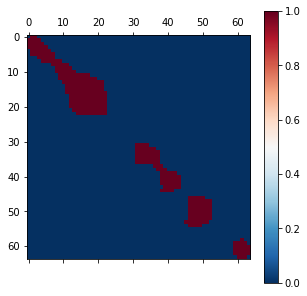

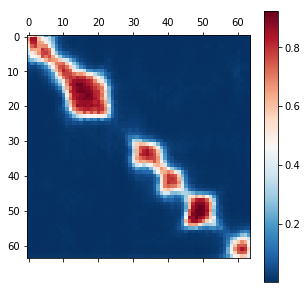

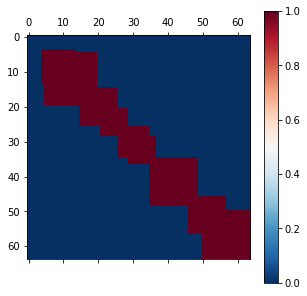

In [8]:
eval_model(image_size = 64, isLog=False, isNormOverDiagonals=True)

Train on 29 samples, validate on 6 samples
Epoch 1/100
29/29 [==============================] - 25s 866ms/step - loss: 0.6171 - acc: 0.6495 - val_loss: 1.0448 - val_acc: 0.7276

Epoch 00001: val_loss improved from inf to 1.04483, saving model to weights/model_unet_128_norm.h5
Epoch 2/100
29/29 [==============================] - 8s 262ms/step - loss: 0.3552 - acc: 0.9399 - val_loss: 0.3170 - val_acc: 0.9425

Epoch 00002: val_loss improved from 1.04483 to 0.31699, saving model to weights/model_unet_128_norm.h5
Epoch 3/100
29/29 [==============================] - 8s 281ms/step - loss: 0.2639 - acc: 0.9460 - val_loss: 0.3402 - val_acc: 0.9278

Epoch 00003: val_loss did not improve from 0.31699
Epoch 4/100
29/29 [==============================] - 9s 293ms/step - loss: 0.2207 - acc: 0.9501 - val_loss: 0.3757 - val_acc: 0.8604

Epoch 00004: val_loss did not improve from 0.31699
Epoch 5/100
29/29 [==============================] - 9s 301ms/step - loss: 0.1916 - acc: 0.9561 - val_loss: 0.2939 -

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


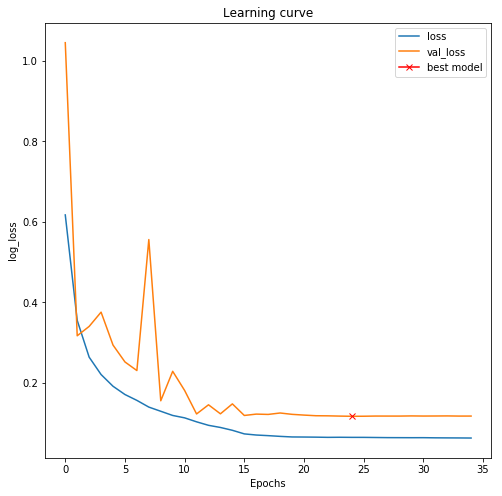

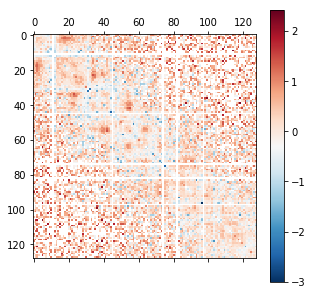

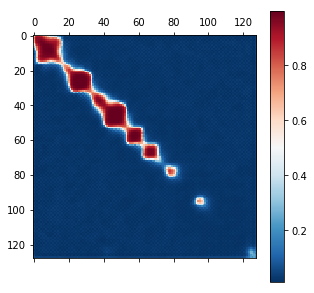

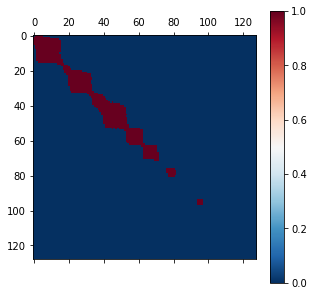

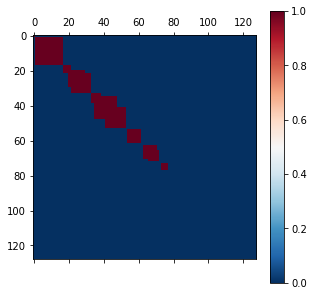

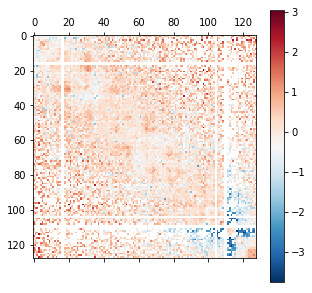

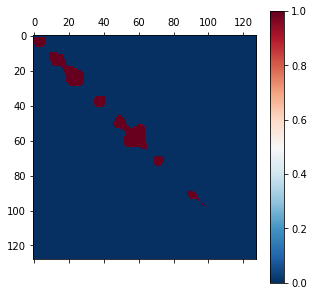

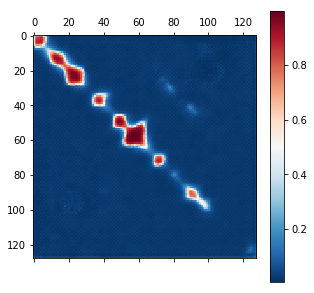

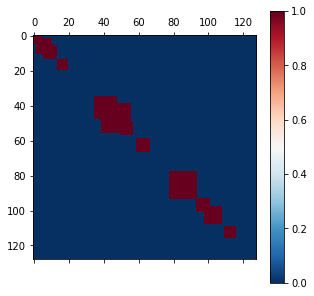

In [9]:
eval_model(image_size = 128, isLog=False, isNormOverDiagonals=True)

Train on 15 samples, validate on 3 samples
Epoch 1/100
15/15 [==============================] - 30s 2s/step - loss: 0.7592 - acc: 0.4025 - val_loss: 1.6764 - val_acc: 0.3738

Epoch 00001: val_loss improved from inf to 1.67642, saving model to weights/model_unet_256_norm.h5
Epoch 2/100
15/15 [==============================] - 10s 684ms/step - loss: 0.5669 - acc: 0.8776 - val_loss: 0.6747 - val_acc: 0.7941

Epoch 00002: val_loss improved from 1.67642 to 0.67469, saving model to weights/model_unet_256_norm.h5
Epoch 3/100
15/15 [==============================] - 11s 704ms/step - loss: 0.4266 - acc: 0.9563 - val_loss: 0.8778 - val_acc: 0.8260

Epoch 00003: val_loss did not improve from 0.67469
Epoch 4/100
15/15 [==============================] - 11s 704ms/step - loss: 0.3382 - acc: 0.9664 - val_loss: 0.3326 - val_acc: 0.9569

Epoch 00004: val_loss improved from 0.67469 to 0.33257, saving model to weights/model_unet_256_norm.h5
Epoch 5/100
15/15 [==============================] - 10s 692ms/s

15/15 [==============================] - 10s 685ms/step - loss: 0.0645 - acc: 0.9860 - val_loss: 0.0956 - val_acc: 0.9743

Epoch 00037: val_loss did not improve from 0.09145
Epoch 38/100
15/15 [==============================] - 11s 716ms/step - loss: 0.0648 - acc: 0.9859 - val_loss: 0.0950 - val_acc: 0.9746

Epoch 00038: ReduceLROnPlateau reducing learning rate to 1e-05.

Epoch 00038: val_loss did not improve from 0.09145
Epoch 39/100
15/15 [==============================] - 12s 781ms/step - loss: 0.0649 - acc: 0.9857 - val_loss: 0.0938 - val_acc: 0.9750

Epoch 00039: val_loss did not improve from 0.09145
Epoch 40/100
15/15 [==============================] - 11s 735ms/step - loss: 0.0641 - acc: 0.9863 - val_loss: 0.0935 - val_acc: 0.9750

Epoch 00040: val_loss did not improve from 0.09145
Epoch 41/100
15/15 [==============================] - 11s 713ms/step - loss: 0.0645 - acc: 0.9858 - val_loss: 0.0924 - val_acc: 0.9755

Epoch 00041: val_loss did not improve from 0.09145
Epoch 42/100


/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


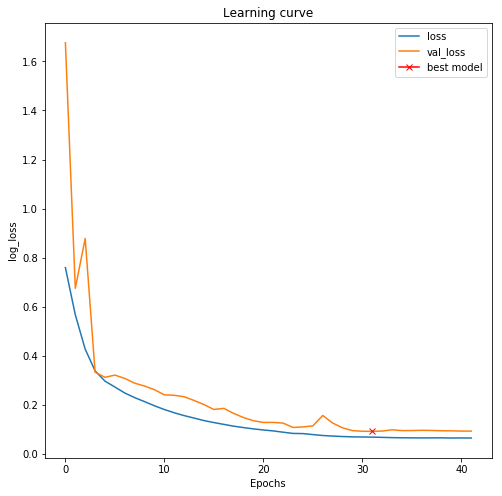

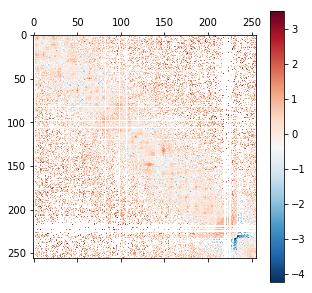

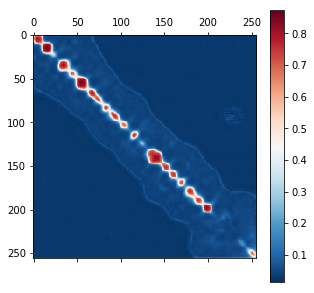

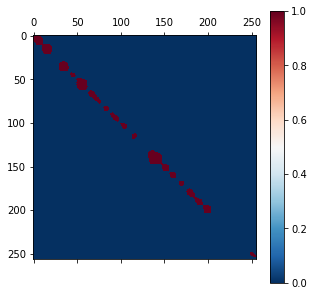

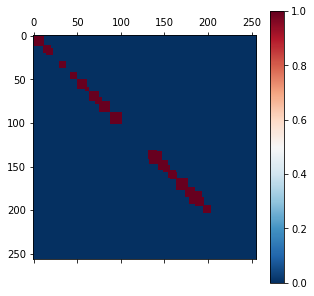

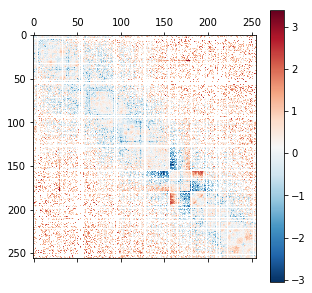

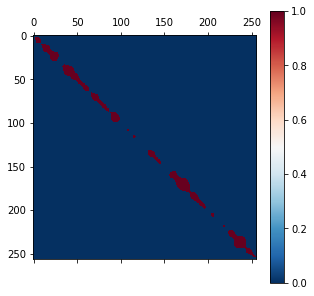

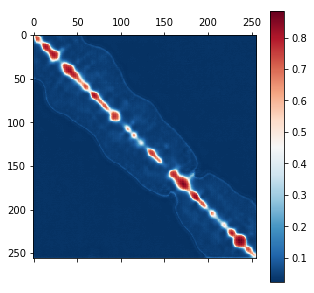

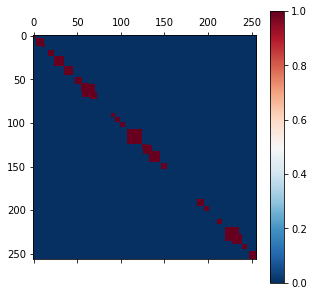

In [10]:
eval_model(image_size = 256, isLog=False, isNormOverDiagonals=True)

NOT log, NOT normalized over diagonals

Train on 113 samples, validate on 21 samples
Epoch 1/100
113/113 [==============================] - 30s 267ms/step - loss: 0.4176 - acc: 0.8076 - val_loss: 0.4496 - val_acc: 0.7827

Epoch 00001: val_loss improved from inf to 0.44959, saving model to weights/model_unet_32.h5
Epoch 2/100
113/113 [==============================] - 11s 102ms/step - loss: 0.3514 - acc: 0.8250 - val_loss: 0.4334 - val_acc: 0.7819

Epoch 00002: val_loss improved from 0.44959 to 0.43342, saving model to weights/model_unet_32.h5
Epoch 3/100
113/113 [==============================] - 13s 112ms/step - loss: 0.3367 - acc: 0.8335 - val_loss: 0.4503 - val_acc: 0.7835

Epoch 00003: val_loss did not improve from 0.43342
Epoch 4/100
113/113 [==============================] - 12s 108ms/step - loss: 0.3243 - acc: 0.8405 - val_loss: 0.4717 - val_acc: 0.7845

Epoch 00004: val_loss did not improve from 0.43342
Epoch 5/100
113/113 [==============================] - 11s 99ms/step - loss: 0.3169 - acc: 0.8473 - val_loss: 0.455

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


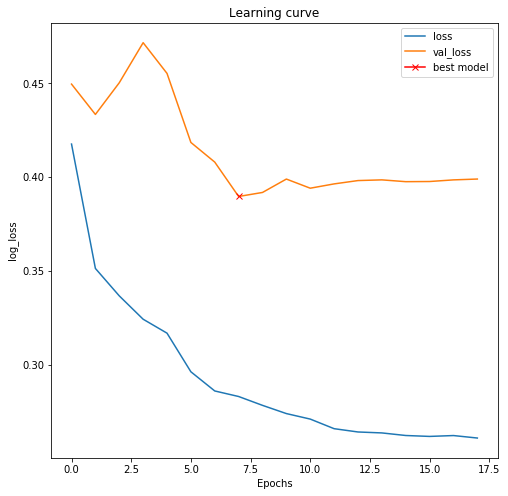

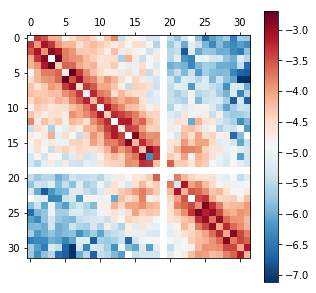

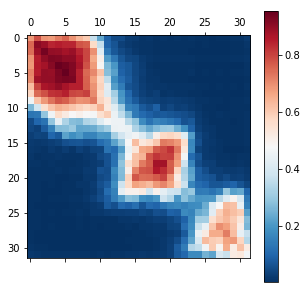

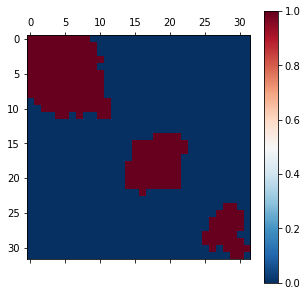

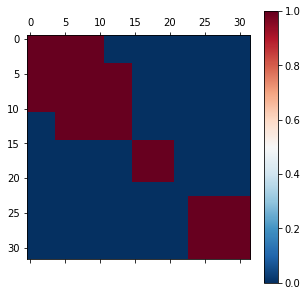

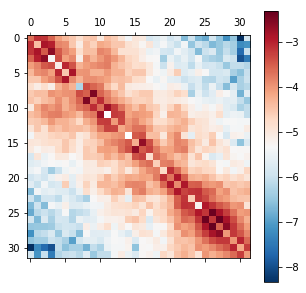

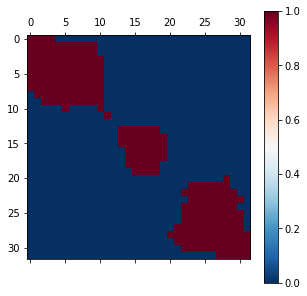

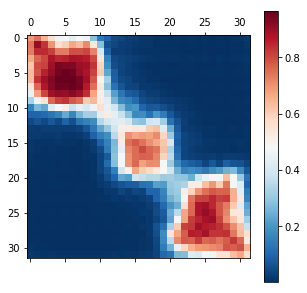

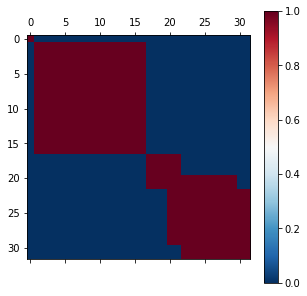

In [11]:
eval_model(image_size = 32, isLog=False, isNormOverDiagonals=False)

Train on 57 samples, validate on 11 samples
Epoch 1/100
57/57 [==============================] - 26s 460ms/step - loss: 0.4668 - acc: 0.8546 - val_loss: 0.3620 - val_acc: 0.9071

Epoch 00001: val_loss improved from inf to 0.36200, saving model to weights/model_unet_64.h5
Epoch 2/100
57/57 [==============================] - 7s 128ms/step - loss: 0.3025 - acc: 0.8977 - val_loss: 0.2600 - val_acc: 0.9082

Epoch 00002: val_loss improved from 0.36200 to 0.26000, saving model to weights/model_unet_64.h5
Epoch 3/100
57/57 [==============================] - 7s 130ms/step - loss: 0.2489 - acc: 0.9037 - val_loss: 0.2485 - val_acc: 0.9012

Epoch 00003: val_loss improved from 0.26000 to 0.24849, saving model to weights/model_unet_64.h5
Epoch 4/100
57/57 [==============================] - 7s 128ms/step - loss: 0.2255 - acc: 0.9050 - val_loss: 0.2032 - val_acc: 0.9143

Epoch 00004: val_loss improved from 0.24849 to 0.20321, saving model to weights/model_unet_64.h5
Epoch 5/100
57/57 [================

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


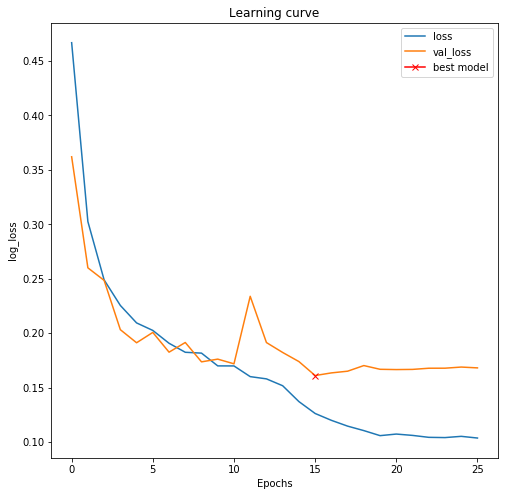

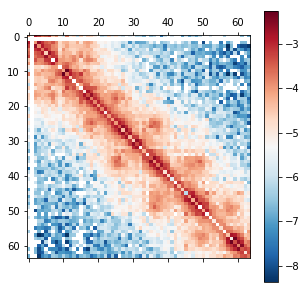

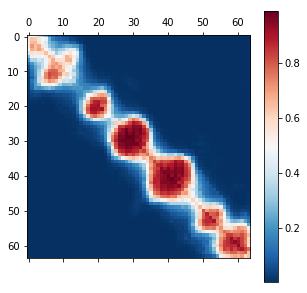

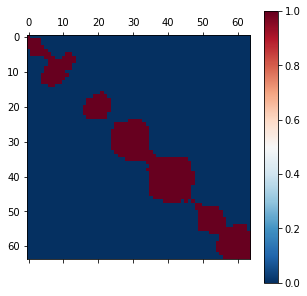

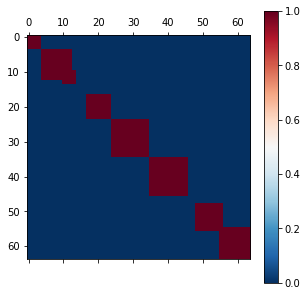

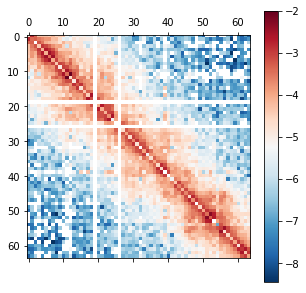

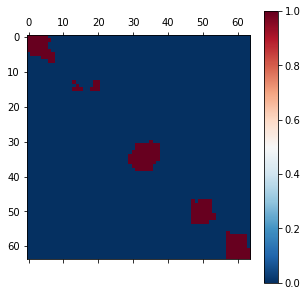

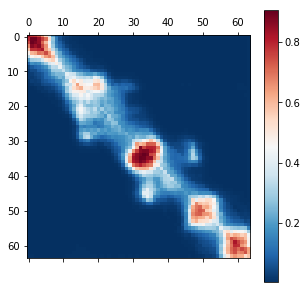

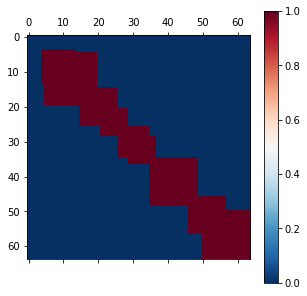

In [12]:
eval_model(image_size = 64, isLog=False, isNormOverDiagonals=False)

Train on 29 samples, validate on 6 samples
Epoch 1/100
29/29 [==============================] - 29s 1s/step - loss: 0.4642 - acc: 0.9101 - val_loss: 0.2860 - val_acc: 0.9507

Epoch 00001: val_loss improved from inf to 0.28598, saving model to weights/model_unet_128.h5
Epoch 2/100
29/29 [==============================] - 8s 271ms/step - loss: 0.3147 - acc: 0.9487 - val_loss: 0.2188 - val_acc: 0.9519

Epoch 00002: val_loss improved from 0.28598 to 0.21878, saving model to weights/model_unet_128.h5
Epoch 3/100
29/29 [==============================] - 8s 275ms/step - loss: 0.2538 - acc: 0.9504 - val_loss: 0.1869 - val_acc: 0.9507

Epoch 00003: val_loss improved from 0.21878 to 0.18692, saving model to weights/model_unet_128.h5
Epoch 4/100
29/29 [==============================] - 8s 288ms/step - loss: 0.2155 - acc: 0.9511 - val_loss: 0.1908 - val_acc: 0.9509

Epoch 00004: val_loss did not improve from 0.18692
Epoch 5/100
29/29 [==============================] - 8s 285ms/step - loss: 0.1861 

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


validation example 2


/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


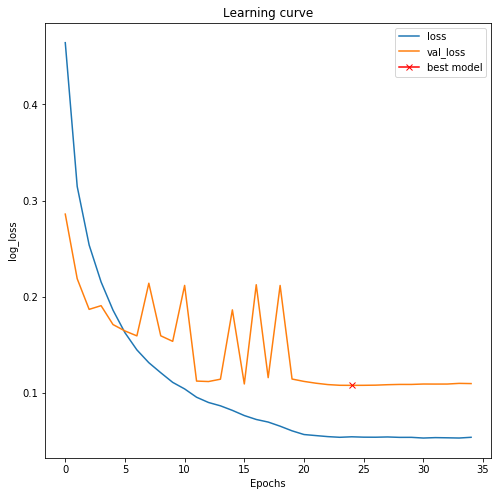

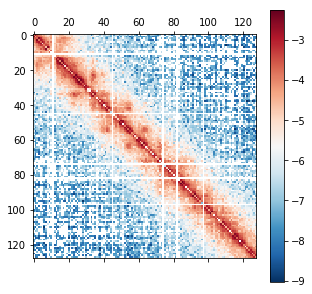

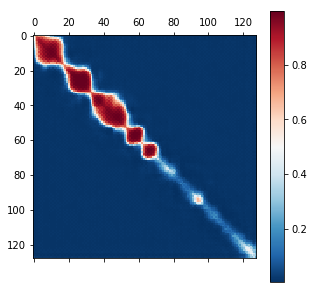

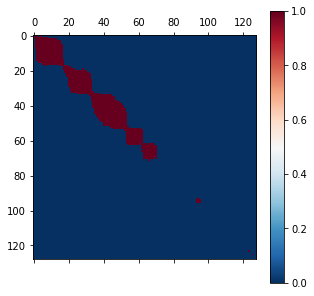

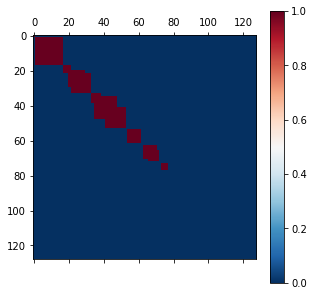

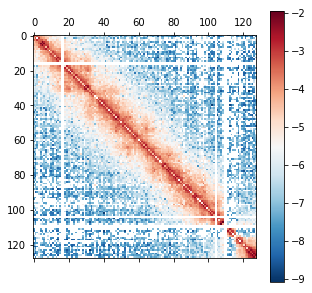

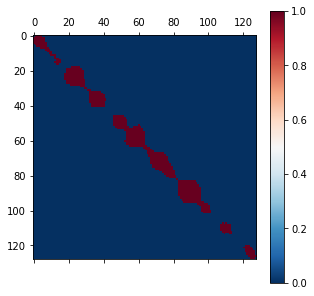

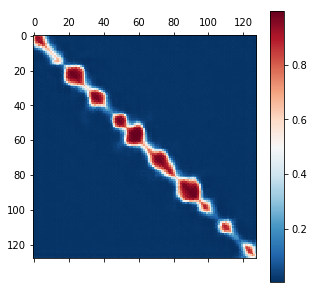

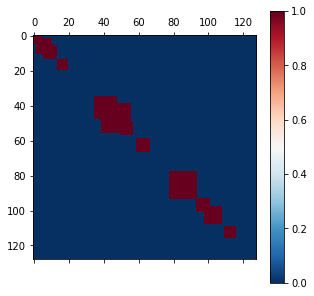

In [13]:
eval_model(image_size = 128, isLog=False, isNormOverDiagonals=False)

Train on 15 samples, validate on 3 samples
Epoch 1/100
15/15 [==============================] - 33s 2s/step - loss: 0.5866 - acc: 0.8494 - val_loss: 0.5175 - val_acc: 0.9382

Epoch 00001: val_loss improved from inf to 0.51745, saving model to weights/model_unet_256.h5
Epoch 2/100
15/15 [==============================] - 10s 691ms/step - loss: 0.4243 - acc: 0.9609 - val_loss: 0.3906 - val_acc: 0.9668

Epoch 00002: val_loss improved from 0.51745 to 0.39059, saving model to weights/model_unet_256.h5
Epoch 3/100
15/15 [==============================] - 10s 684ms/step - loss: 0.3436 - acc: 0.9687 - val_loss: 0.3479 - val_acc: 0.9688

Epoch 00003: val_loss improved from 0.39059 to 0.34790, saving model to weights/model_unet_256.h5
Epoch 4/100
15/15 [==============================] - 10s 688ms/step - loss: 0.2955 - acc: 0.9724 - val_loss: 0.3134 - val_acc: 0.9715

Epoch 00004: val_loss improved from 0.34790 to 0.31341, saving model to weights/model_unet_256.h5
Epoch 5/100
15/15 [=============

15/15 [==============================] - 11s 741ms/step - loss: 0.0794 - acc: 0.9862 - val_loss: 0.0975 - val_acc: 0.9755

Epoch 00038: val_loss did not improve from 0.09556
Epoch 39/100
15/15 [==============================] - 11s 725ms/step - loss: 0.0794 - acc: 0.9862 - val_loss: 0.0976 - val_acc: 0.9756

Epoch 00039: val_loss did not improve from 0.09556
Epoch 40/100
15/15 [==============================] - 11s 719ms/step - loss: 0.0792 - acc: 0.9863 - val_loss: 0.0974 - val_acc: 0.9758

Epoch 00040: ReduceLROnPlateau reducing learning rate to 1e-05.

Epoch 00040: val_loss did not improve from 0.09556
Epoch 41/100
15/15 [==============================] - 11s 727ms/step - loss: 0.0788 - acc: 0.9864 - val_loss: 0.0976 - val_acc: 0.9759

Epoch 00041: val_loss did not improve from 0.09556
Epoch 42/100
15/15 [==============================] - 11s 723ms/step - loss: 0.0795 - acc: 0.9860 - val_loss: 0.0968 - val_acc: 0.9764

Epoch 00042: val_loss did not improve from 0.09556
Epoch 43/100


/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


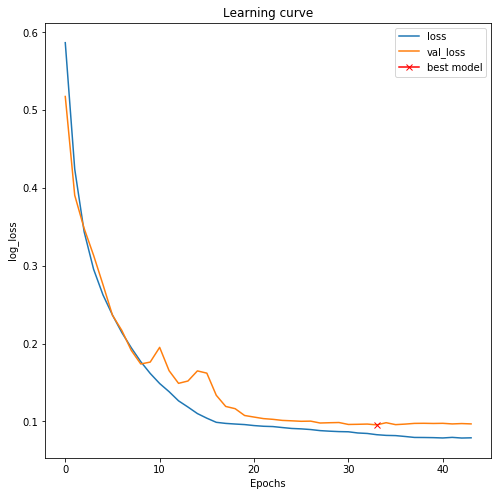

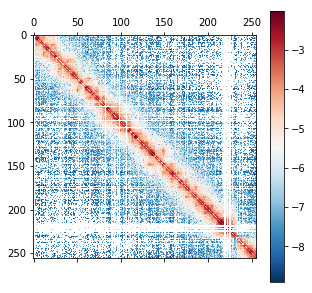

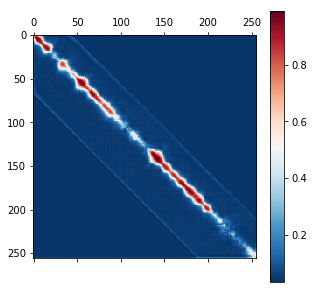

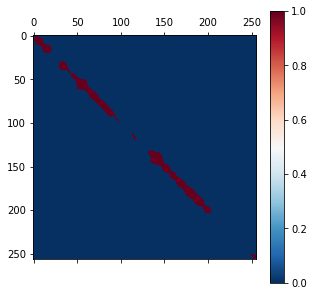

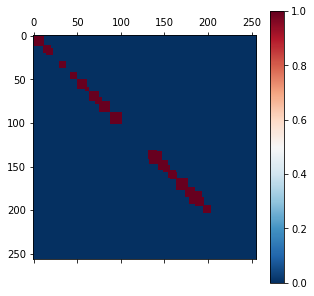

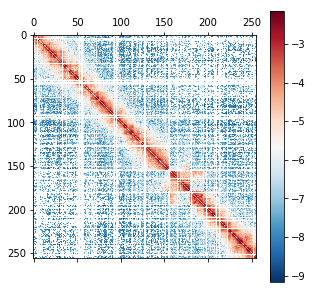

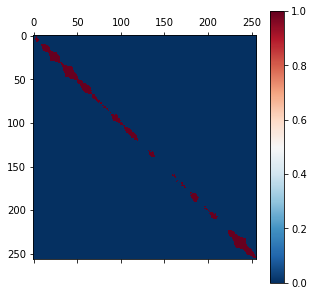

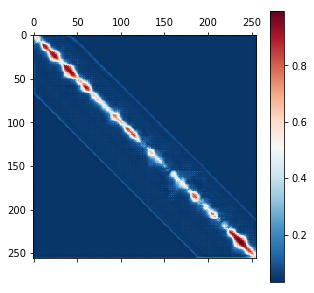

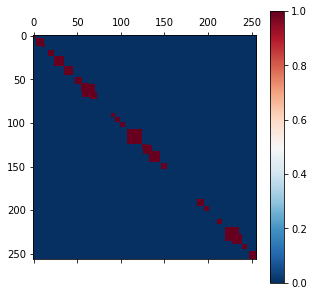

In [14]:
eval_model(image_size = 256, isLog=False, isNormOverDiagonals=False)

log, NOT normalized over diagonals

Train on 113 samples, validate on 21 samples
Epoch 1/100
113/113 [==============================] - 38s 334ms/step - loss: 0.5070 - acc: 0.7434 - val_loss: 0.4750 - val_acc: 0.7765

Epoch 00001: val_loss improved from inf to 0.47499, saving model to weights/model_unet_32_log.h5
Epoch 2/100
113/113 [==============================] - 11s 97ms/step - loss: 0.3716 - acc: 0.8228 - val_loss: 0.4178 - val_acc: 0.7928

Epoch 00002: val_loss improved from 0.47499 to 0.41782, saving model to weights/model_unet_32_log.h5
Epoch 3/100
113/113 [==============================] - 11s 97ms/step - loss: 0.3444 - acc: 0.8284 - val_loss: 0.4448 - val_acc: 0.7736

Epoch 00003: val_loss did not improve from 0.41782
Epoch 4/100
113/113 [==============================] - 11s 99ms/step - loss: 0.3245 - acc: 0.8403 - val_loss: 0.5290 - val_acc: 0.7008

Epoch 00004: val_loss did not improve from 0.41782
Epoch 5/100
113/113 [==============================] - 11s 99ms/step - loss: 0.3210 - acc: 0.8431 - val_loss: 

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


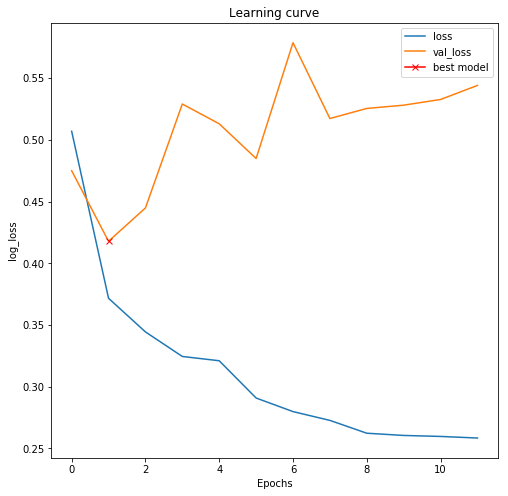

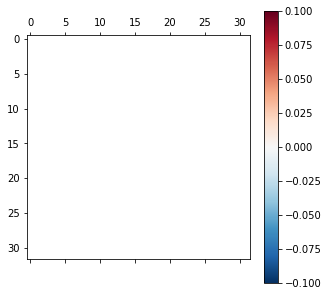

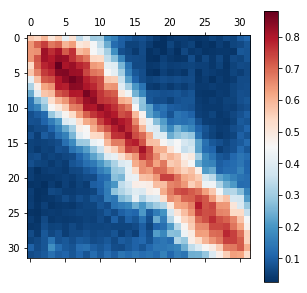

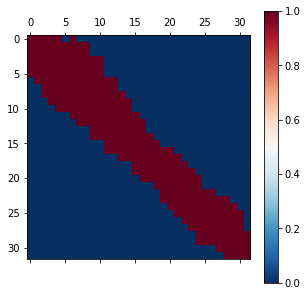

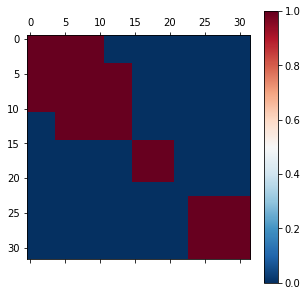

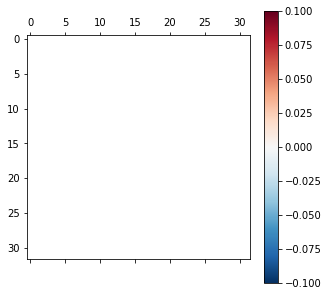

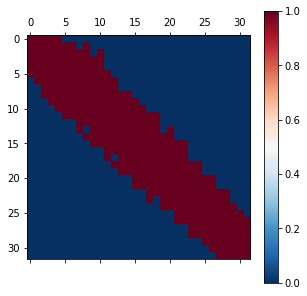

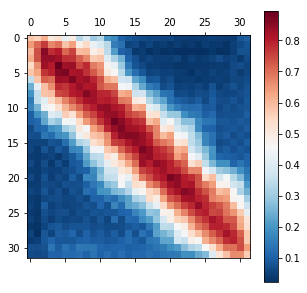

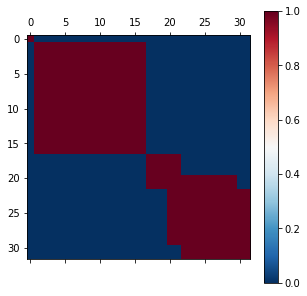

In [15]:
eval_model(image_size = 32, isLog=True, isNormOverDiagonals=False)

Train on 57 samples, validate on 11 samples
Epoch 1/100
57/57 [==============================] - 34s 589ms/step - loss: 0.6072 - acc: 0.6965 - val_loss: 0.5069 - val_acc: 0.8080

Epoch 00001: val_loss improved from inf to 0.50687, saving model to weights/model_unet_64_log.h5
Epoch 2/100
57/57 [==============================] - 8s 141ms/step - loss: 0.3569 - acc: 0.8925 - val_loss: 0.3473 - val_acc: 0.8847

Epoch 00002: val_loss improved from 0.50687 to 0.34729, saving model to weights/model_unet_64_log.h5
Epoch 3/100
57/57 [==============================] - 8s 149ms/step - loss: 0.2793 - acc: 0.8990 - val_loss: 0.2984 - val_acc: 0.8988

Epoch 00003: val_loss improved from 0.34729 to 0.29845, saving model to weights/model_unet_64_log.h5
Epoch 4/100
57/57 [==============================] - 9s 151ms/step - loss: 0.2454 - acc: 0.9012 - val_loss: 0.2636 - val_acc: 0.8973

Epoch 00004: val_loss improved from 0.29845 to 0.26356, saving model to weights/model_unet_64_log.h5
Epoch 5/100
57/57 [

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


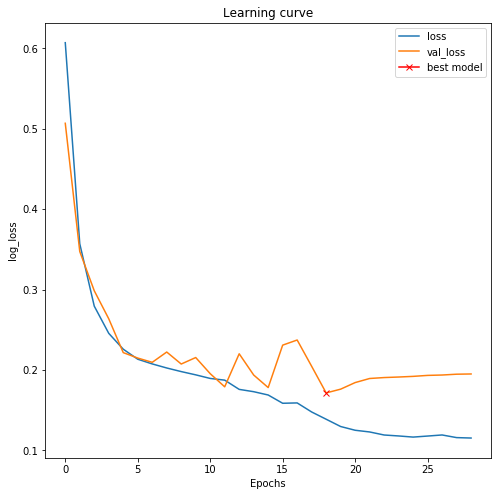

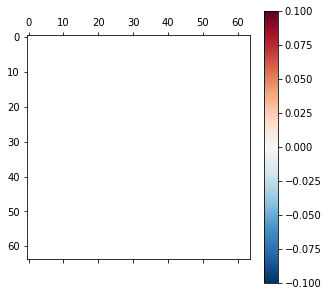

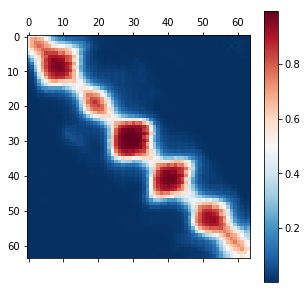

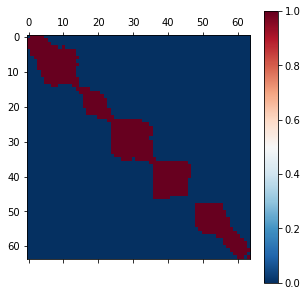

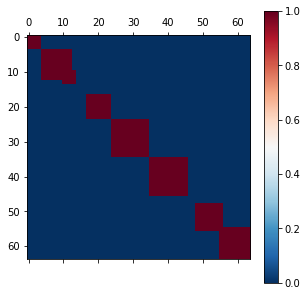

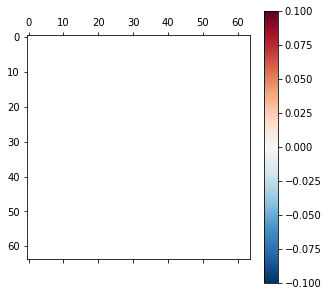

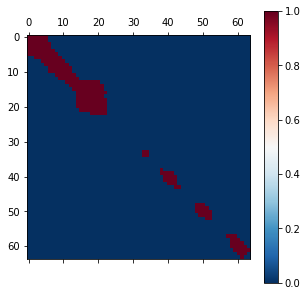

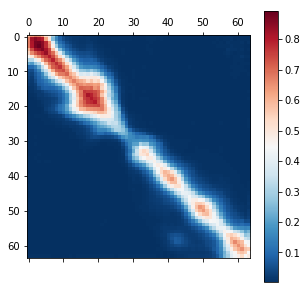

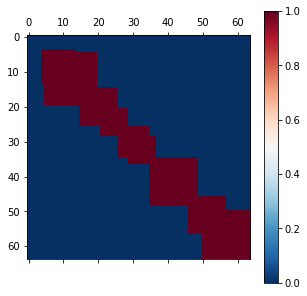

In [16]:
eval_model(image_size = 64, isLog=True, isNormOverDiagonals=False)

Train on 29 samples, validate on 6 samples
Epoch 1/100
29/29 [==============================] - 40s 1s/step - loss: 0.3855 - acc: 0.8800 - val_loss: 0.2675 - val_acc: 0.9188

Epoch 00001: val_loss improved from inf to 0.26746, saving model to weights/model_unet_128_log.h5
Epoch 2/100
29/29 [==============================] - 8s 260ms/step - loss: 0.2490 - acc: 0.9466 - val_loss: 0.2085 - val_acc: 0.9382

Epoch 00002: val_loss improved from 0.26746 to 0.20853, saving model to weights/model_unet_128_log.h5
Epoch 3/100
29/29 [==============================] - 7s 257ms/step - loss: 0.1873 - acc: 0.9500 - val_loss: 0.1847 - val_acc: 0.9430

Epoch 00003: val_loss improved from 0.20853 to 0.18469, saving model to weights/model_unet_128_log.h5
Epoch 4/100
29/29 [==============================] - 7s 258ms/step - loss: 0.1579 - acc: 0.9517 - val_loss: 0.2060 - val_acc: 0.9359

Epoch 00004: val_loss did not improve from 0.18469
Epoch 5/100
29/29 [==============================] - 8s 262ms/step - l

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


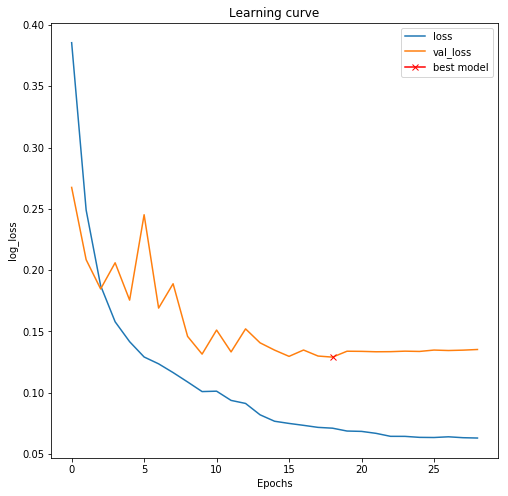

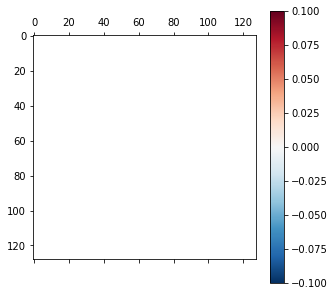

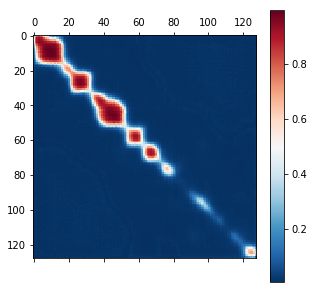

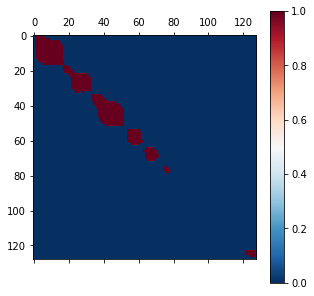

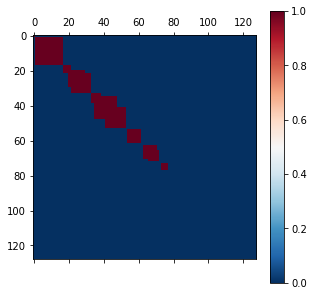

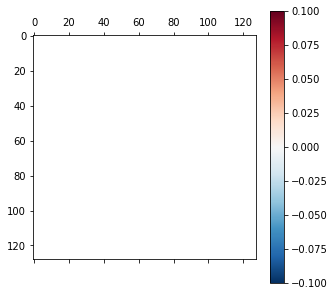

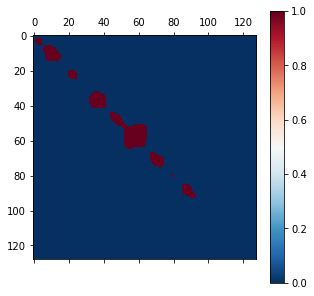

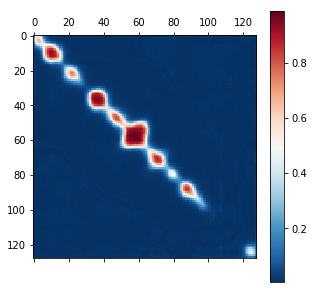

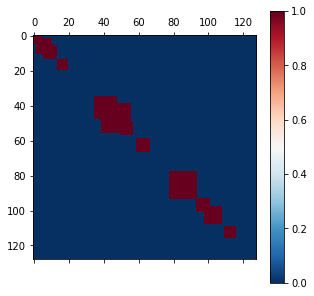

In [17]:
eval_model(image_size = 128, isLog=True, isNormOverDiagonals=False)

Train on 15 samples, validate on 3 samples
Epoch 1/100
15/15 [==============================] - 37s 2s/step - loss: 0.5957 - acc: 0.7156 - val_loss: 0.3900 - val_acc: 0.8527

Epoch 00001: val_loss improved from inf to 0.38996, saving model to weights/model_unet_256_log.h5
Epoch 2/100
15/15 [==============================] - 11s 750ms/step - loss: 0.4491 - acc: 0.9236 - val_loss: 0.4428 - val_acc: 0.8633

Epoch 00002: val_loss did not improve from 0.38996
Epoch 3/100
15/15 [==============================] - 11s 710ms/step - loss: 0.3334 - acc: 0.9666 - val_loss: 1.7887 - val_acc: 0.7073

Epoch 00003: val_loss did not improve from 0.38996
Epoch 4/100
15/15 [==============================] - 10s 674ms/step - loss: 0.2505 - acc: 0.9731 - val_loss: 6.8673 - val_acc: 0.3528

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00004: val_loss did not improve from 0.38996
Epoch 5/100
15/15 [==============================] - 11s 739ms/step - loss: 0.2173 - ac

15/15 [==============================] - 11s 700ms/step - loss: 0.1289 - acc: 0.9886 - val_loss: 0.1524 - val_acc: 0.9725

Epoch 00037: val_loss did not improve from 0.15179
Epoch 38/100
15/15 [==============================] - 10s 699ms/step - loss: 0.1269 - acc: 0.9891 - val_loss: 0.1489 - val_acc: 0.9745

Epoch 00038: val_loss improved from 0.15179 to 0.14892, saving model to weights/model_unet_256_log.h5
Epoch 39/100
15/15 [==============================] - 11s 702ms/step - loss: 0.1259 - acc: 0.9890 - val_loss: 0.1494 - val_acc: 0.9727

Epoch 00039: val_loss did not improve from 0.14892
Epoch 40/100
15/15 [==============================] - 11s 710ms/step - loss: 0.1238 - acc: 0.9895 - val_loss: 0.1507 - val_acc: 0.9723

Epoch 00040: val_loss did not improve from 0.14892
Epoch 41/100
15/15 [==============================] - 11s 707ms/step - loss: 0.1223 - acc: 0.9895 - val_loss: 0.1465 - val_acc: 0.9738

Epoch 00041: val_loss improved from 0.14892 to 0.14649, saving model to weight

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


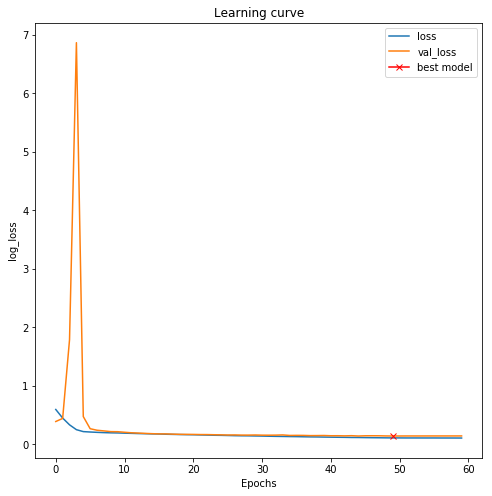

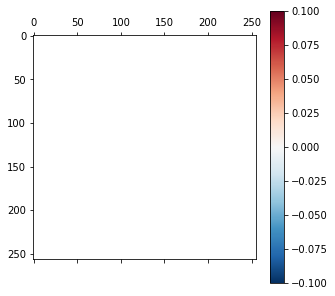

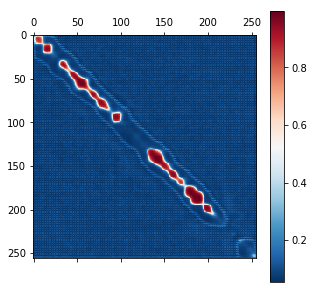

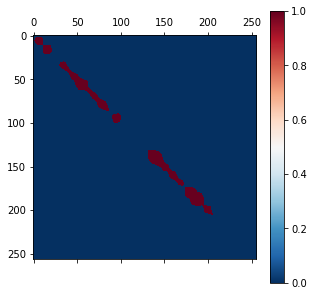

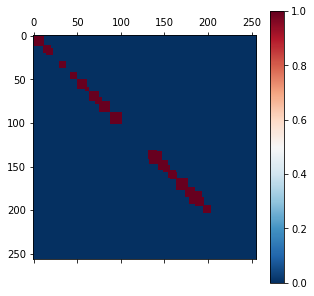

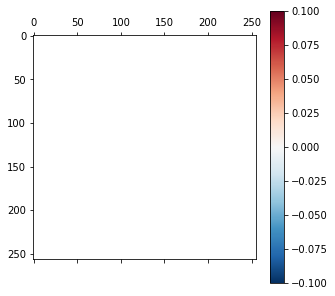

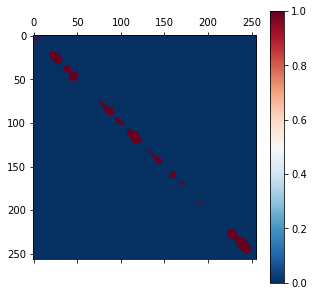

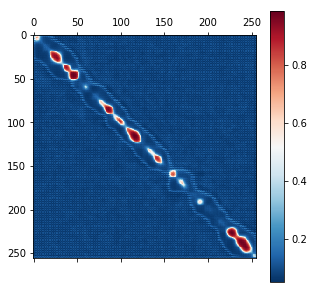

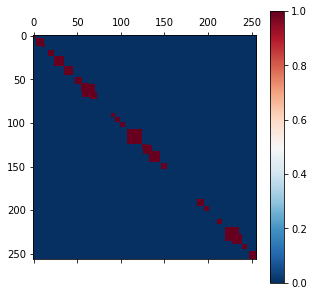

In [18]:
eval_model(image_size = 256, isLog=True, isNormOverDiagonals=False)

log, normalized over diagonals

Train on 113 samples, validate on 21 samples
Epoch 1/100
113/113 [==============================] - 44s 386ms/step - loss: 0.6090 - acc: 0.7025 - val_loss: 0.4753 - val_acc: 0.8000

Epoch 00001: val_loss improved from inf to 0.47534, saving model to weights/model_unet_32_norm_log.h5
Epoch 2/100
113/113 [==============================] - 13s 111ms/step - loss: 0.3752 - acc: 0.8287 - val_loss: 0.4716 - val_acc: 0.7816

Epoch 00002: val_loss improved from 0.47534 to 0.47155, saving model to weights/model_unet_32_norm_log.h5
Epoch 3/100
113/113 [==============================] - 12s 110ms/step - loss: 0.3334 - acc: 0.8435 - val_loss: 0.4084 - val_acc: 0.8061

Epoch 00003: val_loss improved from 0.47155 to 0.40844, saving model to weights/model_unet_32_norm_log.h5
Epoch 4/100
113/113 [==============================] - 11s 100ms/step - loss: 0.3114 - acc: 0.8535 - val_loss: 0.4091 - val_acc: 0.8043

Epoch 00004: val_loss did not improve from 0.40844
Epoch 5/100
113/113 [=====================

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log


validation example 2


/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


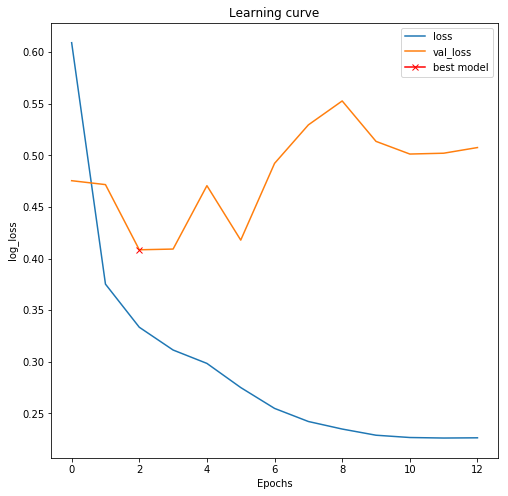

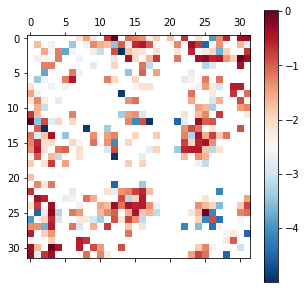

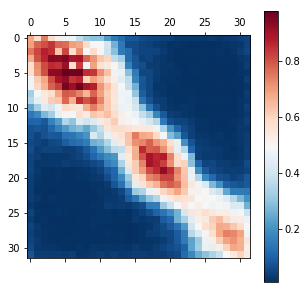

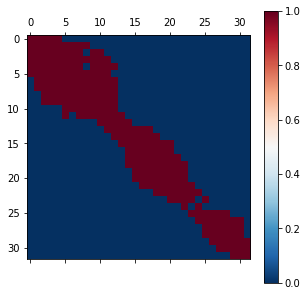

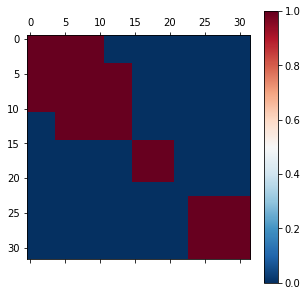

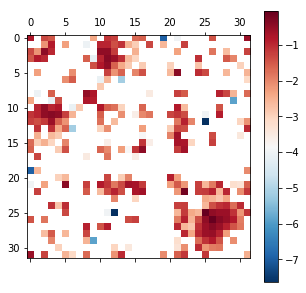

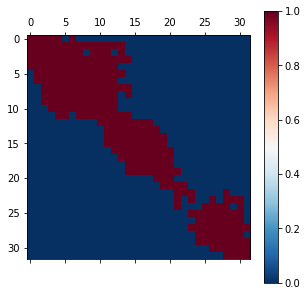

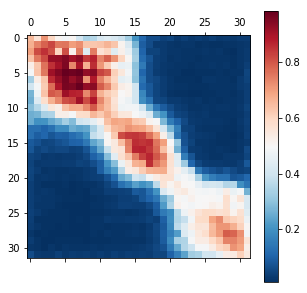

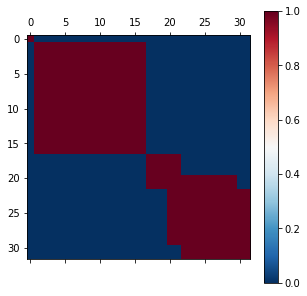

In [19]:
eval_model(image_size = 32, isLog=True, isNormOverDiagonals=True)

Train on 57 samples, validate on 11 samples
Epoch 1/100
57/57 [==============================] - 145s 3s/step - loss: 0.7091 - acc: 0.5564 - val_loss: 2.3749 - val_acc: 0.3856

Epoch 00001: val_loss improved from inf to 2.37491, saving model to weights/model_unet_64_norm_log.h5
Epoch 2/100
57/57 [==============================] - 25s 447ms/step - loss: 0.3945 - acc: 0.8657 - val_loss: 0.4292 - val_acc: 0.8535

Epoch 00002: val_loss improved from 2.37491 to 0.42920, saving model to weights/model_unet_64_norm_log.h5
Epoch 3/100
57/57 [==============================] - 27s 475ms/step - loss: 0.3036 - acc: 0.8863 - val_loss: 0.3716 - val_acc: 0.8306

Epoch 00003: val_loss improved from 0.42920 to 0.37163, saving model to weights/model_unet_64_norm_log.h5
Epoch 4/100
57/57 [==============================] - 27s 482ms/step - loss: 0.2603 - acc: 0.8988 - val_loss: 0.2970 - val_acc: 0.8746

Epoch 00004: val_loss improved from 0.37163 to 0.29699, saving model to weights/model_unet_64_norm_log.h

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


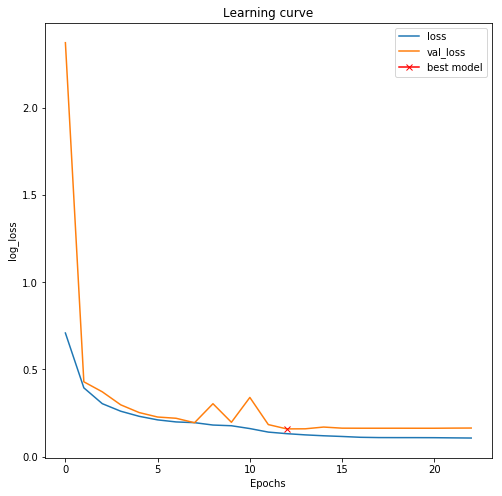

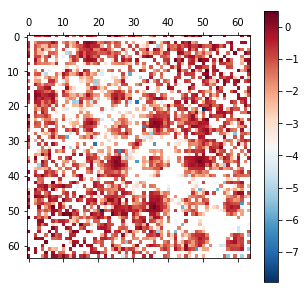

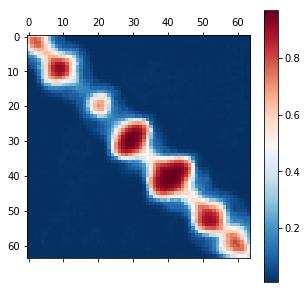

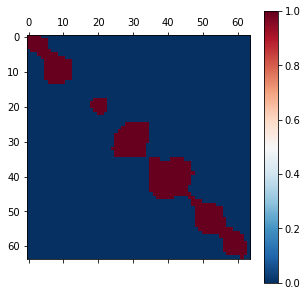

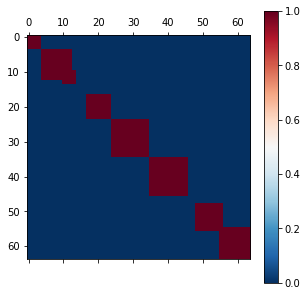

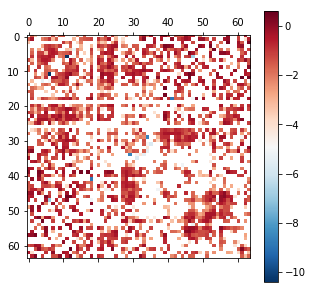

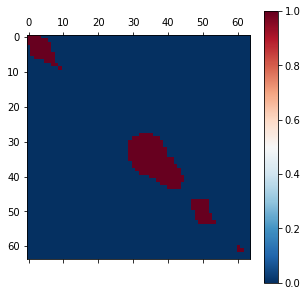

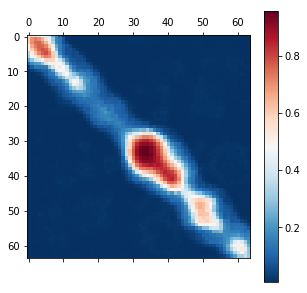

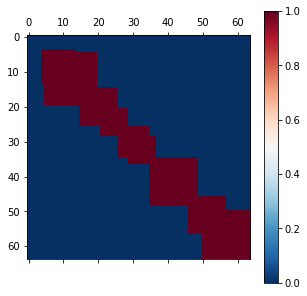

In [20]:
eval_model(image_size = 64, isLog=True, isNormOverDiagonals=True)

Train on 29 samples, validate on 6 samples
Epoch 1/100
29/29 [==============================] - 40s 1s/step - loss: 0.5634 - acc: 0.7439 - val_loss: 0.3130 - val_acc: 0.9212

Epoch 00001: val_loss improved from inf to 0.31295, saving model to weights/model_unet_128_norm_log.h5
Epoch 2/100
29/29 [==============================] - 8s 264ms/step - loss: 0.3303 - acc: 0.9305 - val_loss: 0.2751 - val_acc: 0.9366

Epoch 00002: val_loss improved from 0.31295 to 0.27510, saving model to weights/model_unet_128_norm_log.h5
Epoch 3/100
29/29 [==============================] - 8s 273ms/step - loss: 0.2294 - acc: 0.9473 - val_loss: 0.3495 - val_acc: 0.9414

Epoch 00003: val_loss did not improve from 0.27510
Epoch 4/100
29/29 [==============================] - 8s 279ms/step - loss: 0.1891 - acc: 0.9557 - val_loss: 0.3855 - val_acc: 0.9225

Epoch 00004: val_loss did not improve from 0.27510
Epoch 5/100
29/29 [==============================] - 8s 287ms/step - loss: 0.1646 - acc: 0.9599 - val_loss: 0.4

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


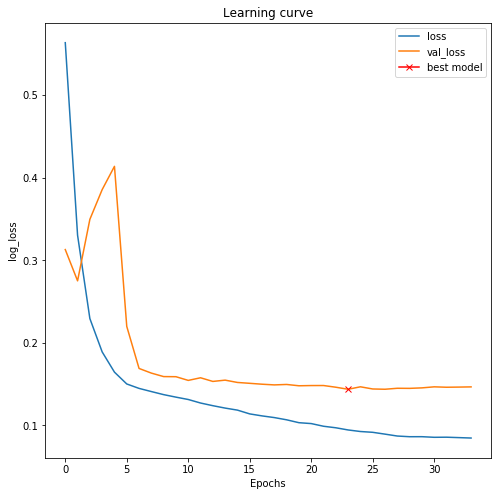

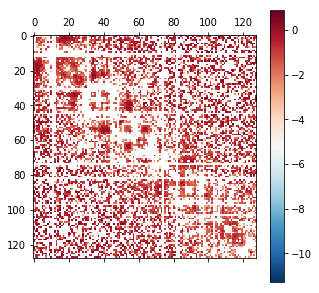

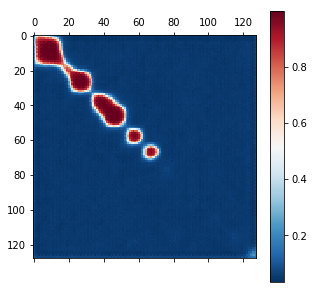

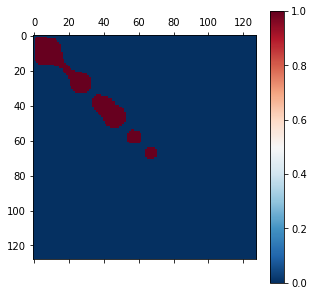

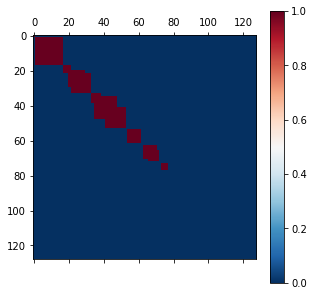

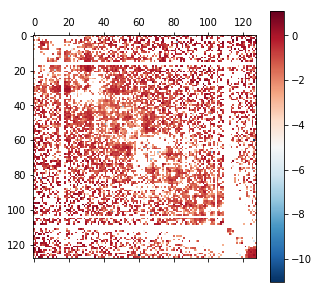

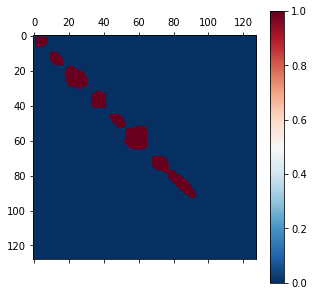

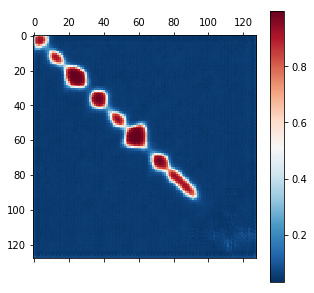

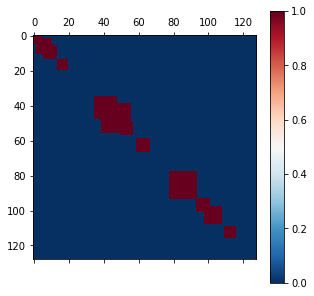

In [21]:
eval_model(image_size = 128, isLog=True, isNormOverDiagonals=True)

Train on 15 samples, validate on 3 samples
Epoch 1/100
15/15 [==============================] - 44s 3s/step - loss: 0.8515 - acc: 0.3539 - val_loss: 13.3502 - val_acc: 0.0437

Epoch 00001: val_loss improved from inf to 13.35018, saving model to weights/model_unet_256_norm_log.h5
Epoch 2/100
15/15 [==============================] - 11s 706ms/step - loss: 0.5461 - acc: 0.8396 - val_loss: 5.6745 - val_acc: 0.3557

Epoch 00002: val_loss improved from 13.35018 to 5.67446, saving model to weights/model_unet_256_norm_log.h5
Epoch 3/100
15/15 [==============================] - 11s 727ms/step - loss: 0.4175 - acc: 0.9599 - val_loss: 3.3287 - val_acc: 0.6475

Epoch 00003: val_loss improved from 5.67446 to 3.32875, saving model to weights/model_unet_256_norm_log.h5
Epoch 4/100
15/15 [==============================] - 10s 696ms/step - loss: 0.3559 - acc: 0.9678 - val_loss: 1.5141 - val_acc: 0.7782

Epoch 00004: val_loss improved from 3.32875 to 1.51412, saving model to weights/model_unet_256_norm_

15/15 [==============================] - 11s 758ms/step - loss: 0.0553 - acc: 0.9912 - val_loss: 0.0952 - val_acc: 0.9754

Epoch 00037: ReduceLROnPlateau reducing learning rate to 1e-05.

Epoch 00037: val_loss did not improve from 0.09511
Epoch 38/100
15/15 [==============================] - 11s 724ms/step - loss: 0.0550 - acc: 0.9914 - val_loss: 0.0952 - val_acc: 0.9755

Epoch 00038: val_loss did not improve from 0.09511
Epoch 39/100
15/15 [==============================] - 11s 749ms/step - loss: 0.0553 - acc: 0.9912 - val_loss: 0.0953 - val_acc: 0.9755

Epoch 00039: val_loss did not improve from 0.09511
Epoch 40/100
15/15 [==============================] - 11s 720ms/step - loss: 0.0549 - acc: 0.9913 - val_loss: 0.0953 - val_acc: 0.9755

Epoch 00040: val_loss did not improve from 0.09511
Epoch 41/100
15/15 [==============================] - 11s 751ms/step - loss: 0.0549 - acc: 0.9915 - val_loss: 0.0954 - val_acc: 0.9756

Epoch 00041: val_loss did not improve from 0.09511
Epoch 42/100


/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


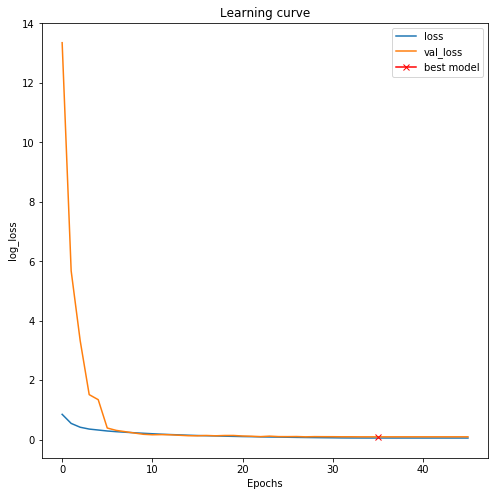

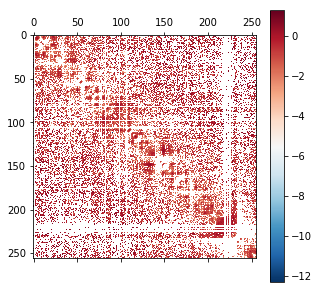

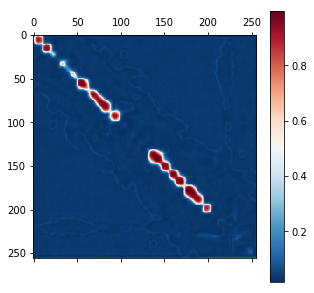

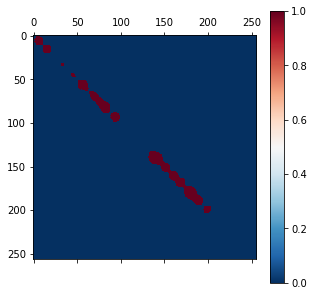

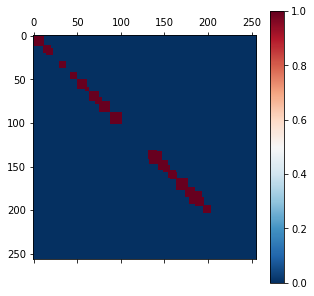

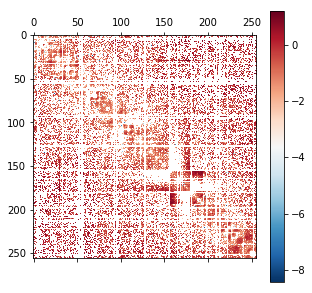

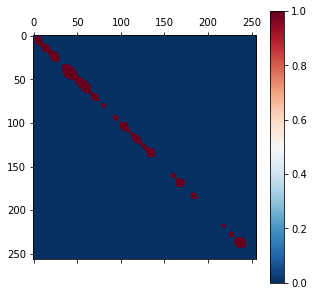

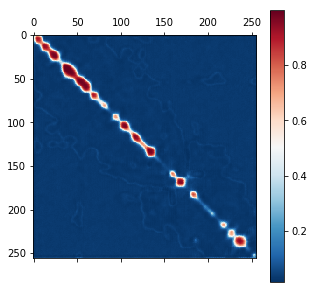

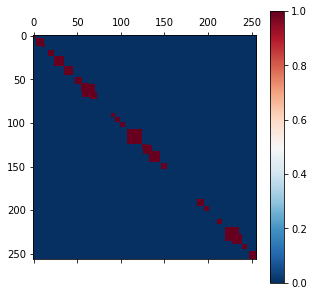

In [22]:
eval_model(image_size = 256, isLog=True, isNormOverDiagonals=True)